# Comparison of algorithm

We focus on real projective spaces and their suspensions, representing the action of $Sq^k$ on the cohomology generator in degree $d$ of the $i$ suspension of $\mathbb R \mathrm P^n$.

In [1]:
from new_implementation import SQ
from time import perf_counter
import pickle
import matplotlib.pyplot as plt

def create_space(i, n):
    """Returns a simplicial complex model of the sth 
    suspension of RPn"""
    space = simplicial_complexes.RealProjectiveSpace(n)
    space = space.suspension(i)
    space.set_immutable()
    return space

def num_simplices(i, n):
    "Returns the number of simplices of Si RPn given (i,n)"
    space = create_space(i, n)
    return sum(len(v) for v in space.faces().values())
    
def compare(i, n, k, d, repeat=1):
    """
    Stores in dict data the pair of times it takes to compute
    Sqi(d) on Si RPn"""
    t, tt = 0, 0
    space = create_space(i, n)
    P = space.cohomology_ring(GF(2))
    x = P.basis()[(d, 0)]
    for _ in range(repeat):
        tic1 = perf_counter()  # time
        old = x.Sq(k)
        toc1 = perf_counter()  # time
        t += (toc1-tic1)

        tic2 = perf_counter()  # time
        new = SQ(x, k)
        toc2 = perf_counter()  # time
        tt += (toc2 - tic2)

    if not old == new:
        print("something went wrong")
        
    print(f"S{i:<2} RP{n} | Sq{k}-{d:<2} | {repeat :<5} | {int(bool(new)):^3}" +
          f" | {str(t+tt)[:5]} | {tt/repeat:9f}")
    
    data[(i, n, k, d)] = tuple([t/repeat, tt/repeat])
    
def save_obj(obj, name):
    """Save pickle file"""
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    """Load pickle file"""
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def compare_plot(data, name, xstring, save=True, log=True, rotate=False):
    "Plotting function tunned for our needs"
    plt.figure(figsize=(10,5))
    x = [str(k).replace(' ','') for k in data.keys()]
    y1 = [v[0]*1000 for v in data.values()]
    y2 = [v[1]*1000 for v in data.values()]
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.ylabel('Execution time in miliseconds\n', fontsize='large')
    plt.xlabel(xstring, fontsize='large')
    if rotate:
        plt.xticks(rotation=45)
    if log:
        plt.yscale('log')
    if save:
        plt.savefig(name, bbox_inches='tight')
    plt.show()

## $Sq^1(i+1)$ on $\Sigma^i \mathbb R \mathrm P^2$ for $i \in \{0, \dots, 9\}$

In [ ]:
data = {}
reps = 100
print('Space   | OP     | rpt   | img | total | new average')
print('-'*52)
t = perf_counter()
for i in range(11):
    compare(i, 2, 1, i+1, repeat=int(reps/2**i))
tt = perf_counter()
print('-'*52)
print(f'It took {tt-t} secs')
save_obj(data, 'comp_sus_rp2')

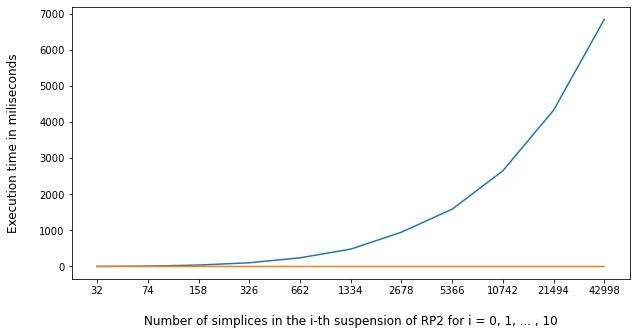

In [5]:
data = load_obj('comp_sus_rp2')
data = {f'{num_simplices(k[0], 2)}':v for k,v in data.items()}
name = 'comp_sus_rp2.pdf'
xstring = '\nNumber of simplices in the i-th suspension of RP2 for i = 0, 1, ... , 10'

compare_plot(data, name, xstring, log=False)

## General $Sq^k(d)$ on $\Sigma^s \mathbb R \mathrm P^n \sim (s,n,k,d)$

In [ ]:
cases = [
    (0,2,1,1), (1,2,1,2), (2,2,1,3), (3,2,1,4), (4,2,1,5),
    (0,3,1,1), (0,3,1,2),
    (1,3,1,2), (1,3,1,3), (1,3,2,2),
    (2,3,1,3), (2,3,1,4), (2,3,2,3),
    (3,3,1,4), (3,3,1,5), (3,3,2,4),
    (0,4,1,1), (0,4,1,2), (0,4,1,3), (0,4,2,2),
    (1,4,1,2), (1,4,1,3), (1,4,1,4), (1,4,2,2), (1,4,2,3),
    (2,4,1,3), (2,4,1,4), (2,4,1,5), (2,4,2,3), (2,4,2,4),
]

#(0,5,1,1), (0,5,1,2), (0,5,1,3), (0,5,2,2), (0,5,2,3) # Warning: old version takes an hour each of these

In [ ]:
# data = {}
# reps = 0
# print('Space  | OP     | rpt | img | old/new | new')
# print('-------------------------------------------')
# t = perf_counter()
# for case in cases:
#     compare(*case, repeat=reps)
# tt = perf_counter()
# print('-------------------------------------------')
# print(f'It took {tt-t} secs')
# save_obj(data, 'comp_times')

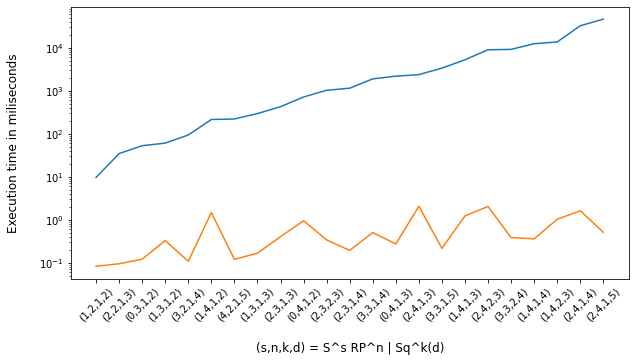

In [91]:
data = load_obj('comp_times')
data = {k:v for k, v in data.items() if k[2] != k[3]}
name = 'comparison.pdf'
xstring = '\n(s,n,k,d) = S^s RP^n | Sq^k(d)'
compare_plot(data, name, xstring, log=True, rotate=True)